# Smart Data Curation. Practice
This notebook will present the applications of the main functions that were discussed at the lecture


In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import plotly.express as px
from scipy import stats
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import plotly.graph_objects as go
colors = ['#082040', '#175073', '#3285A6', '#B8D0D9', '#6CC5D9']

### 1. AqSolDB: Selected dataset on water solubility
Database [AqSolDB](https://www.kaggle.com/datasets/sorkun/aqsoldb-a-curated-aqueous-solubility-dataset ), created by the Autonomous Energy Materials Discovery [AMD] research group, consists of water solubility values of 9,982 unique compounds selected from 9 different publicly available water solubility datasets. This publicly available dataset, which is the largest of its kind, will not only serve as a useful reference source for measured solubility data, but also a significantly improved and generalizable source of training data for building data-driven models.

**Content**

In addition to the specified experimental solubility values, AqSolDB also contains some relevant topological and physico-chemical 2D descriptors calculated using RDKit. In addition, AqSolDB contains validated molecular representations of each of the compounds.

In [2]:
# Reading data
df = pd.read_csv('regina_data_with_descriptors.csv')
df.head()

,Unnamed: 0,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,NumAtoms,...,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi,smiles
0,0,129.042593,129.115,4.0,1.0,3.0,1.0,4.0,9.0,16.0,...,2.614120,1.346061,1.346061,0.661663,-0.90,6.223457,2.144233,0.928882,1.482727,C1C(CN1)(C=O)OC=O
1,1,126.104465,126.199,1.0,0.0,3.0,0.0,1.0,9.0,23.0,...,3.361137,0.952015,0.952015,0.518283,-0.48,8.520000,7.520000,7.520000,7.118933,CCC#CCCCOC
2,2,127.063329,127.143,3.0,1.0,0.0,1.0,2.0,9.0,18.0,...,3.243139,2.025049,2.025049,1.315724,-0.73,5.086451,1.403530,0.676972,0.793220,CC1NC(=O)OC2CC12
3,3,127.085795,127.151,5.0,3.0,1.0,2.0,5.0,9.0,18.0,...,2.580316,1.020335,1.020335,0.502436,-1.26,5.869199,1.925197,0.932992,1.255485,CNc1nc(n(n1)C)N
4,4,124.063663,124.143,3.0,1.0,0.0,1.0,3.0,9.0,17.0,...,3.111471,2.166863,2.166863,1.573785,-0.59,5.214986,1.282121,0.520627,0.742916,OC1CN2CC2(C1)C#N


In [3]:
#Information on the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       20000 non-null  int64  
 1   exactmw                          20000 non-null  float64
 2   amw                              20000 non-null  float64
 3   lipinskiHBA                      20000 non-null  float64
 4   lipinskiHBD                      20000 non-null  float64
 5   NumRotatableBonds                20000 non-null  float64
 6   NumHBD                           20000 non-null  float64
 7   NumHBA                           20000 non-null  float64
 8   NumHeavyAtoms                    20000 non-null  float64
 9   NumAtoms                         20000 non-null  float64
 10  NumHeteroatoms                   20000 non-null  float64
 11  NumAmideBonds                    20000 non-null  float64
 12  FractionCSP3      

At this stage, we can remove unnecessary columns with different representations of molecules, leaving only columns that will be useful for further data analysis and property prediction.

In [4]:
df = df.drop(columns = ['Unnamed: 0'])

## Find missing data in our database.

In [5]:
# Let's check the number of gaps in the various columns
df.isna().sum()

exactmw                            0
amw                                0
lipinskiHBA                        0
lipinskiHBD                        0
NumRotatableBonds                  0
NumHBD                             0
NumHBA                             0
NumHeavyAtoms                      0
NumAtoms                           0
NumHeteroatoms                     0
NumAmideBonds                      0
FractionCSP3                       0
NumRings                           0
NumAromaticRings                   0
NumAliphaticRings                  0
NumSaturatedRings                  0
NumHeterocycles                    0
NumAromaticHeterocycles            0
NumSaturatedHeterocycles           0
NumAliphaticHeterocycles           0
NumSpiroAtoms                      0
NumBridgeheadAtoms                 0
NumAtomStereoCenters               0
NumUnspecifiedAtomStereoCenters    0
labuteASA                          0
tpsa                               0
CrippenClogP                       0
C

## There are no missing values. So, I did not removed any rows. No values were deleted, no gaps were present. So, no changes occurred.

In [6]:
df = df.dropna() # Removing missing rows from the whole dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   exactmw                          20000 non-null  float64
 1   amw                              20000 non-null  float64
 2   lipinskiHBA                      20000 non-null  float64
 3   lipinskiHBD                      20000 non-null  float64
 4   NumRotatableBonds                20000 non-null  float64
 5   NumHBD                           20000 non-null  float64
 6   NumHBA                           20000 non-null  float64
 7   NumHeavyAtoms                    20000 non-null  float64
 8   NumAtoms                         20000 non-null  float64
 9   NumHeteroatoms                   20000 non-null  float64
 10  NumAmideBonds                    20000 non-null  float64
 11  FractionCSP3                     20000 non-null  float64
 12  NumRings          

## 3. Working with duplicates
There were two duplicates and they were removed using following command.

In [8]:
# Removing complete duplicates
df1 = df.drop_duplicates()

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19998 entries, 0 to 19999
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   exactmw                          19998 non-null  float64
 1   amw                              19998 non-null  float64
 2   lipinskiHBA                      19998 non-null  float64
 3   lipinskiHBD                      19998 non-null  float64
 4   NumRotatableBonds                19998 non-null  float64
 5   NumHBD                           19998 non-null  float64
 6   NumHBA                           19998 non-null  float64
 7   NumHeavyAtoms                    19998 non-null  float64
 8   NumAtoms                         19998 non-null  float64
 9   NumHeteroatoms                   19998 non-null  float64
 10  NumAmideBonds                    19998 non-null  float64
 11  FractionCSP3                     19998 non-null  float64
 12  NumRings               

## There are no repeated smiles.

In [10]:
smiles_counts = df1['smiles'].value_counts()
# Filter out the repeated samples
repeated_samples = smiles_counts[smiles_counts > 1]
print(repeated_samples)
# Print the repeated samples and their number of repetitions
for sample, count in repeated_samples.items():
    print(f"Sample: {sample}, Repeated: {count} times")

Series([], Name: count, dtype: int64)


### 4. Outlier detection
#### 4.1. Visualization
Outliers can be detected by displaying graphs, let's look at the histogram and the violin plot

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19998 entries, 0 to 19999
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   exactmw                          19998 non-null  float64
 1   amw                              19998 non-null  float64
 2   lipinskiHBA                      19998 non-null  float64
 3   lipinskiHBD                      19998 non-null  float64
 4   NumRotatableBonds                19998 non-null  float64
 5   NumHBD                           19998 non-null  float64
 6   NumHBA                           19998 non-null  float64
 7   NumHeavyAtoms                    19998 non-null  float64
 8   NumAtoms                         19998 non-null  float64
 9   NumHeteroatoms                   19998 non-null  float64
 10  NumAmideBonds                    19998 non-null  float64
 11  FractionCSP3                     19998 non-null  float64
 12  NumRings               

## Visualize the violin plot

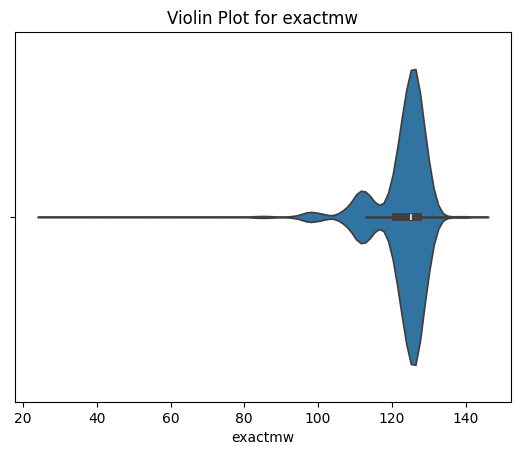

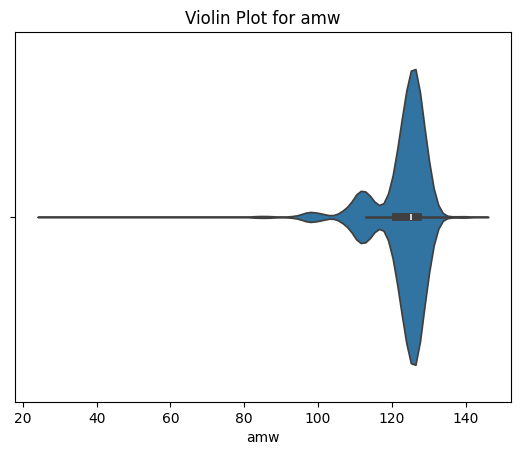

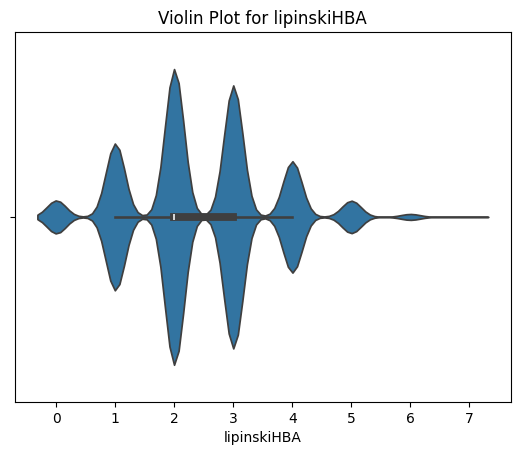

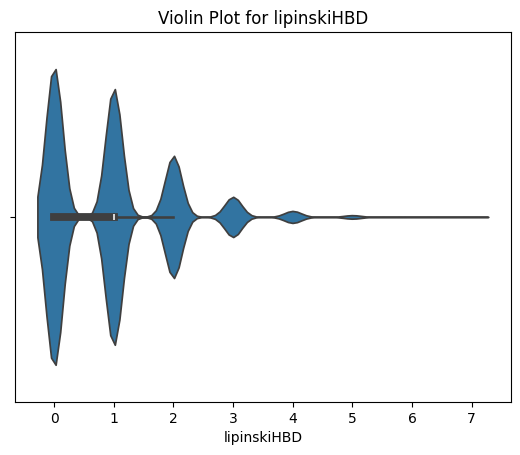

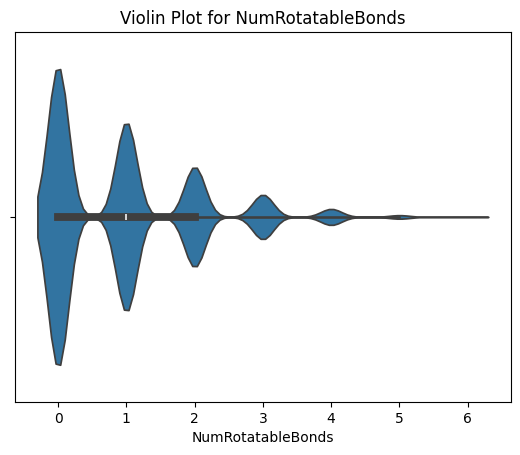

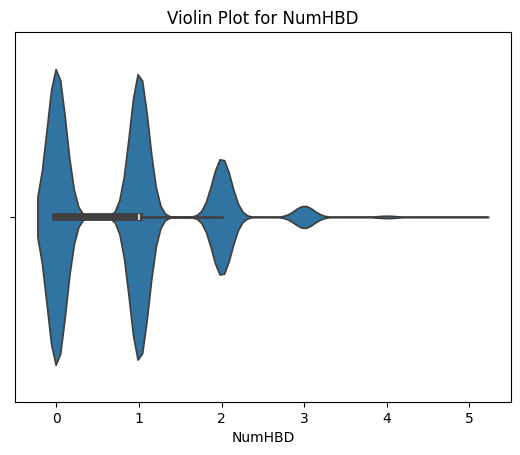

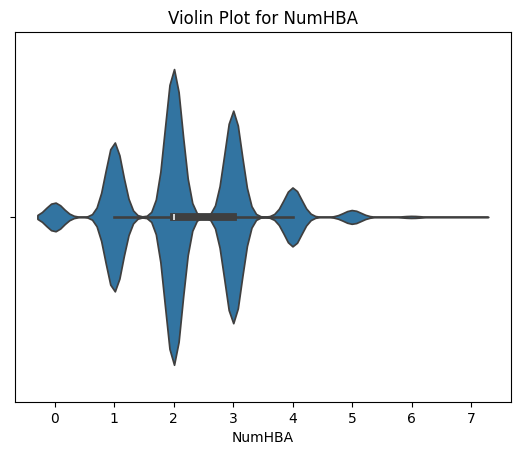

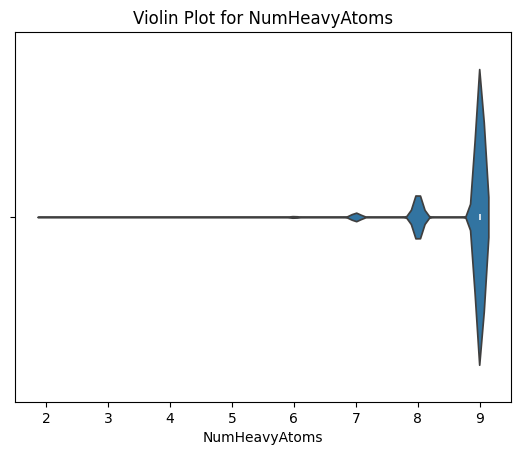

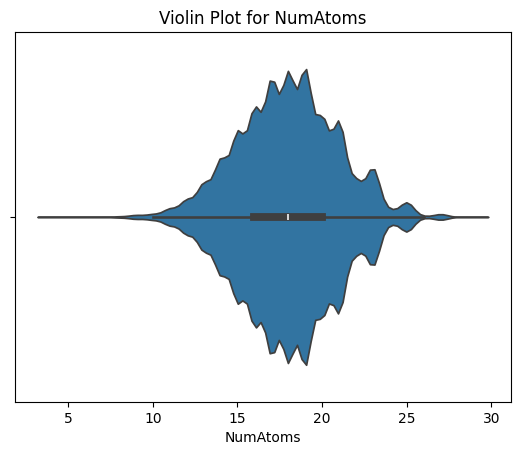

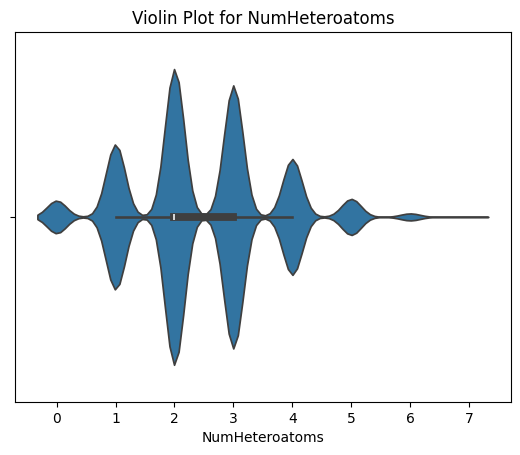

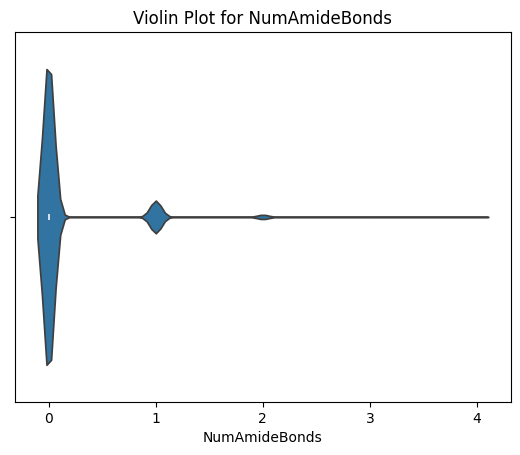

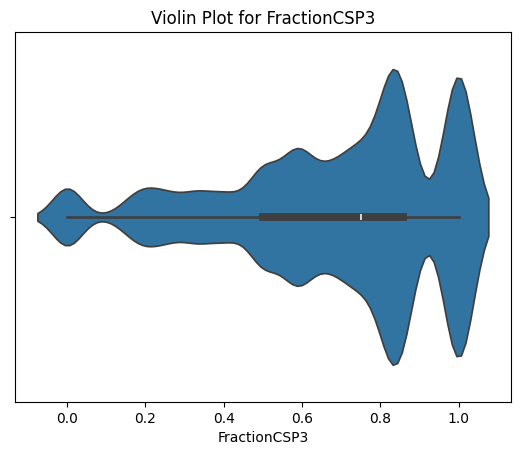

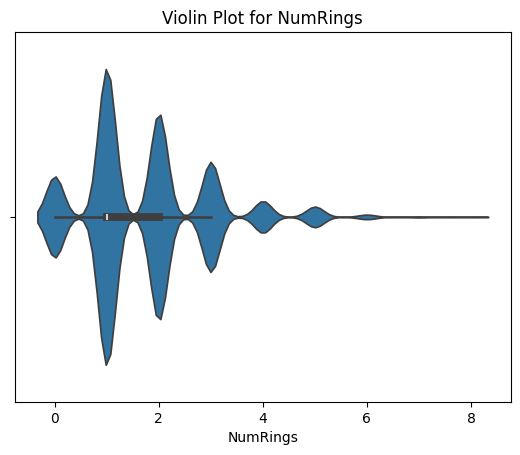

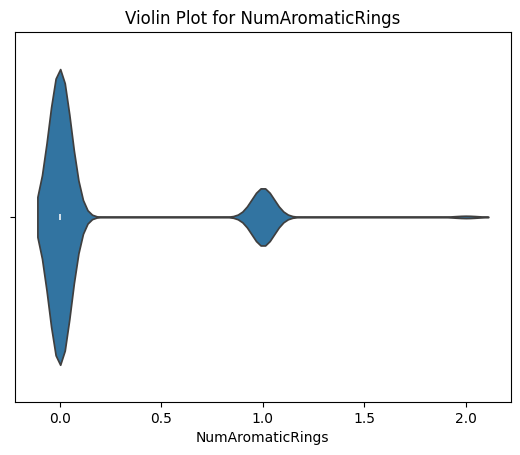

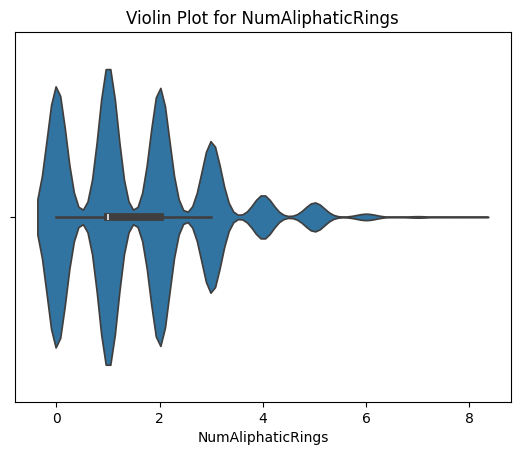

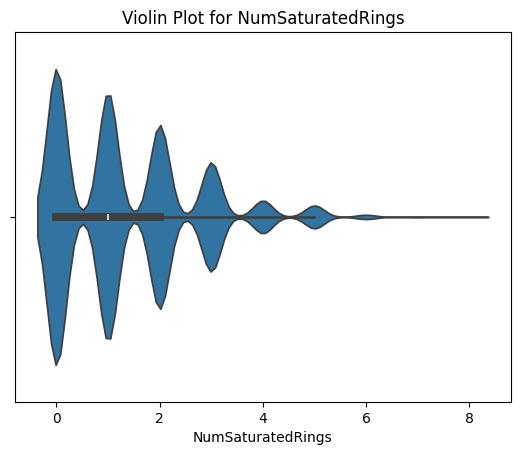

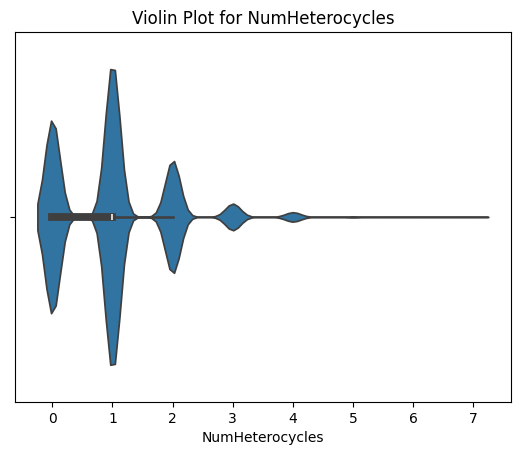

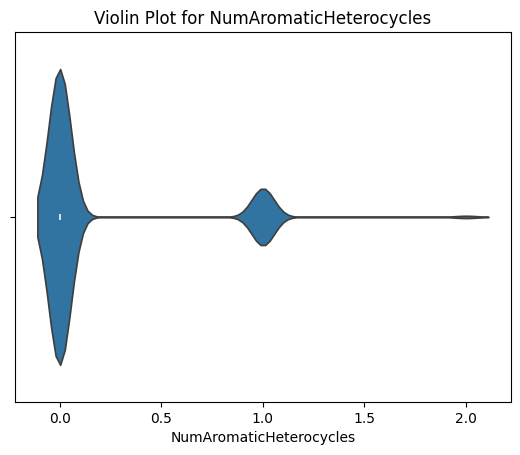

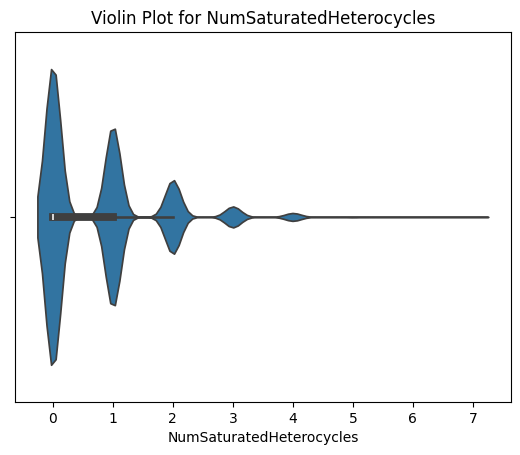

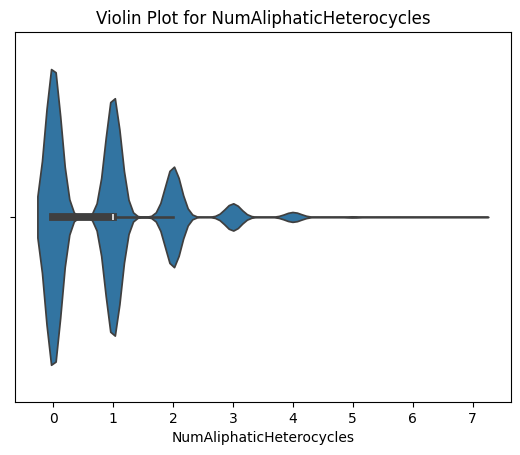

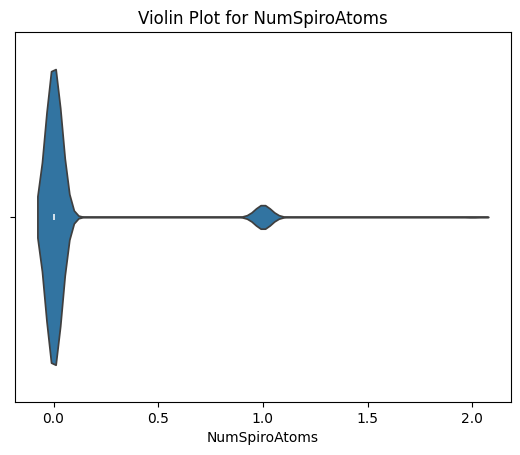

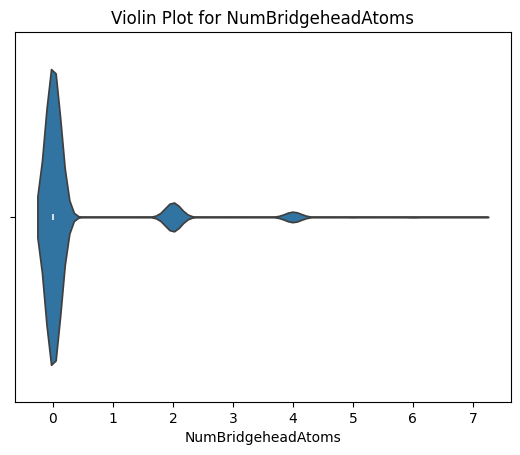

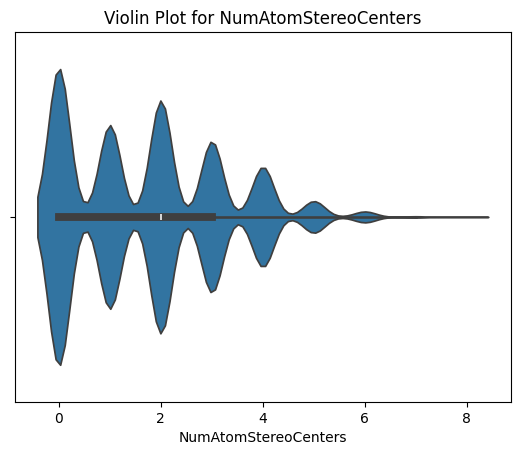

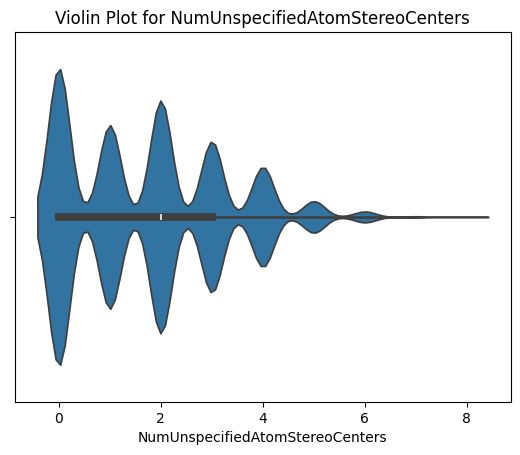

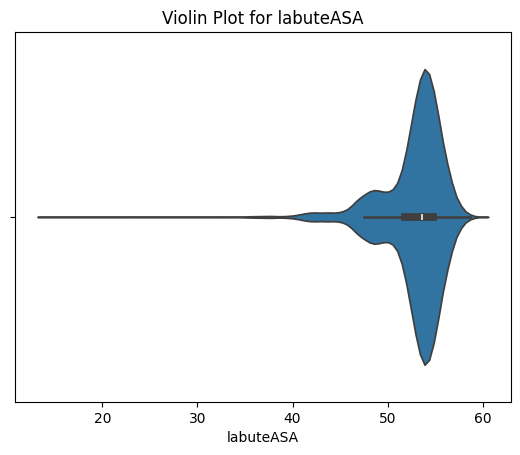

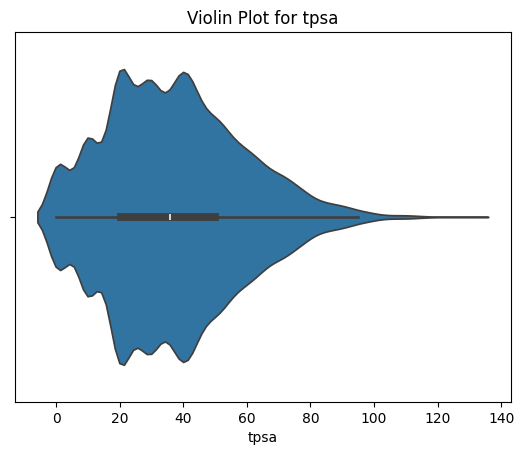

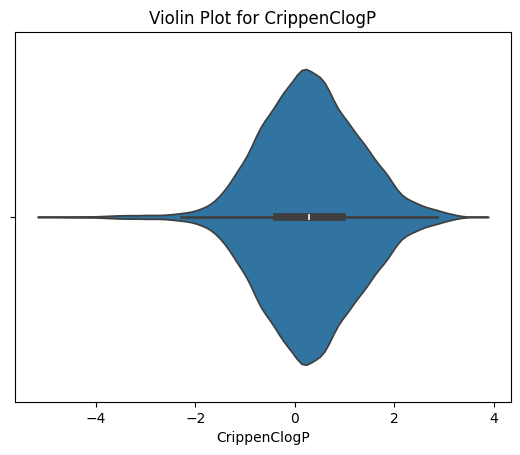

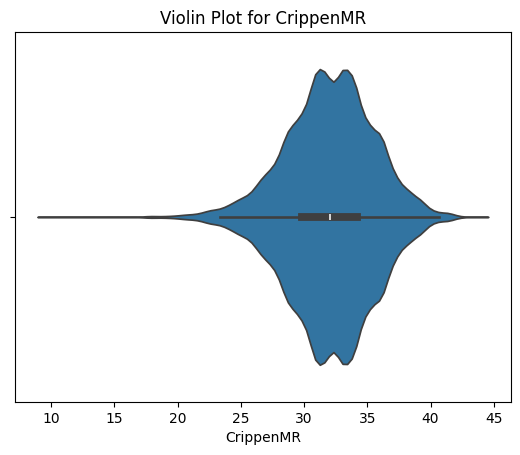

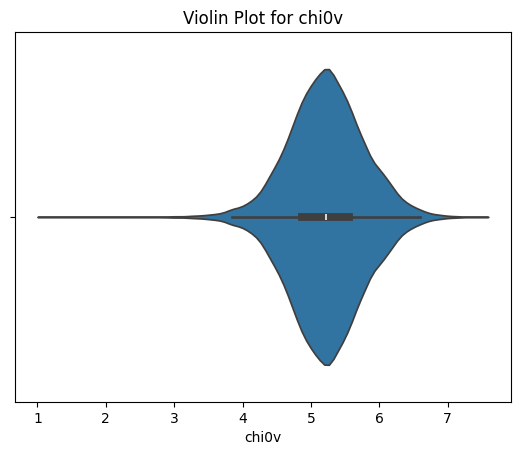

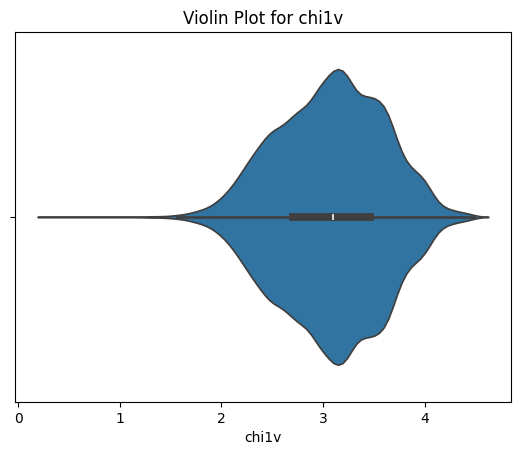

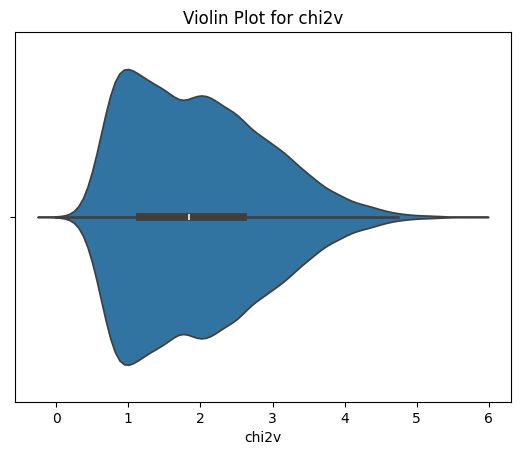

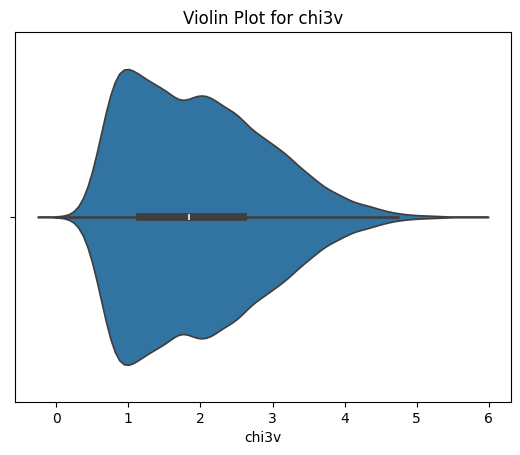

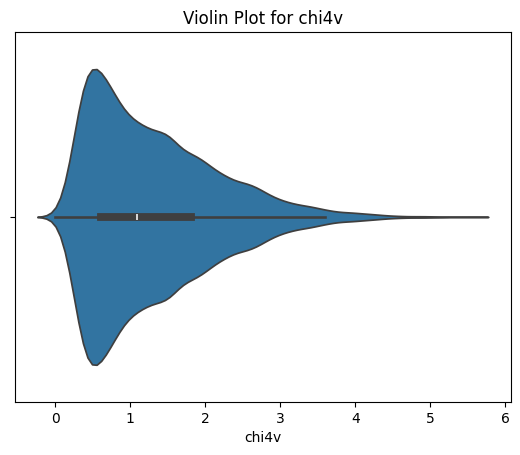

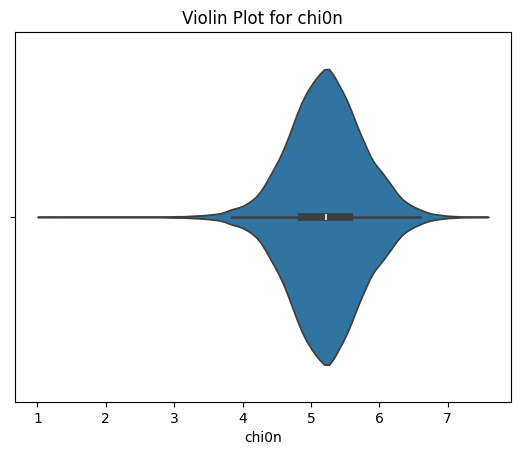

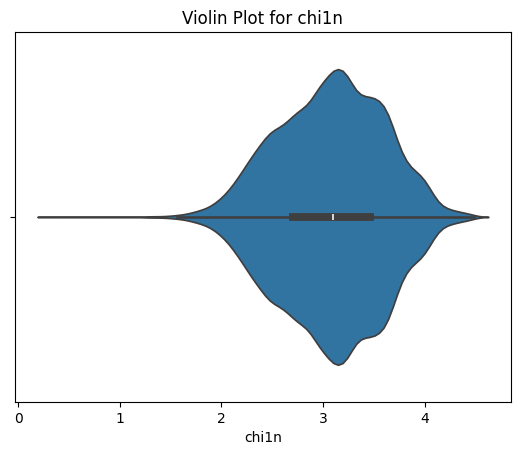

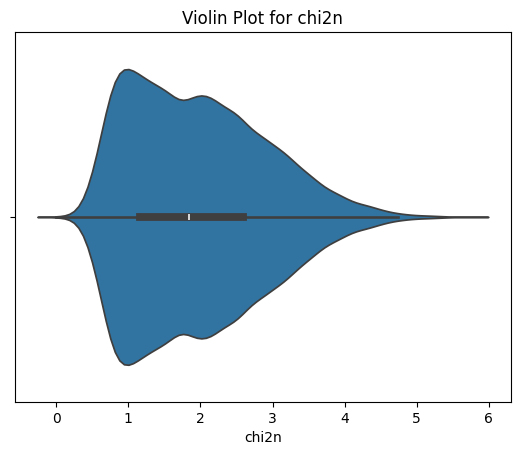

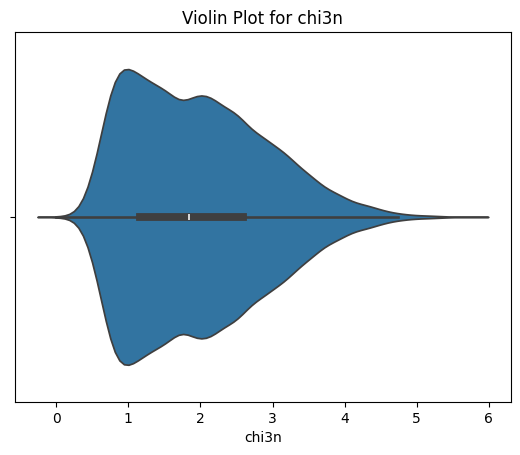

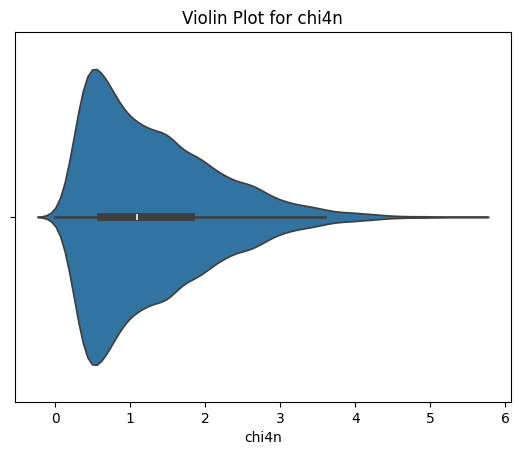

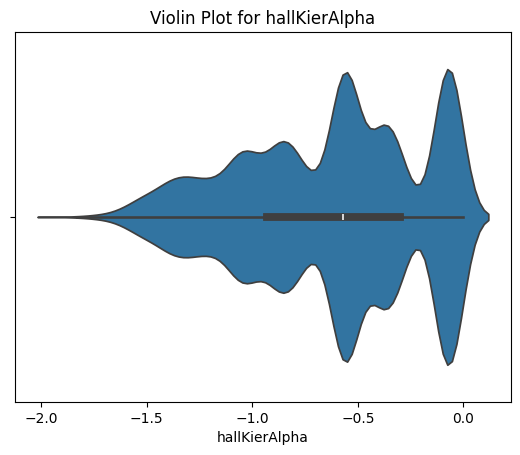

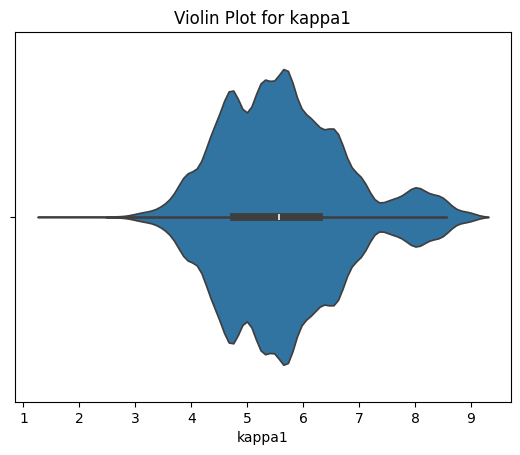

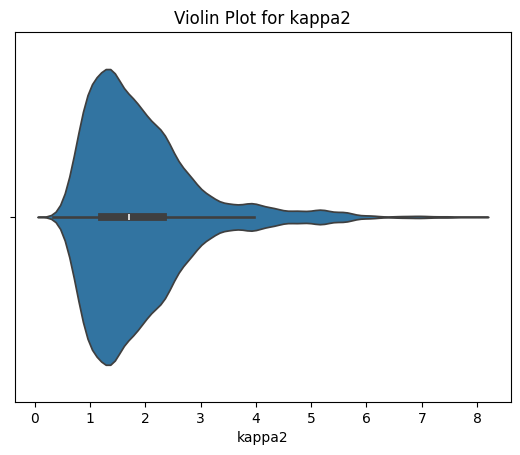

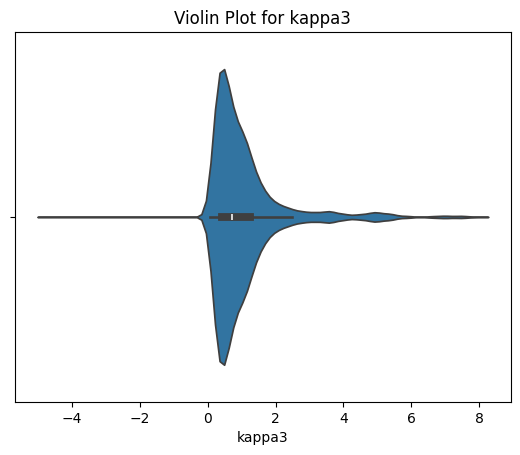

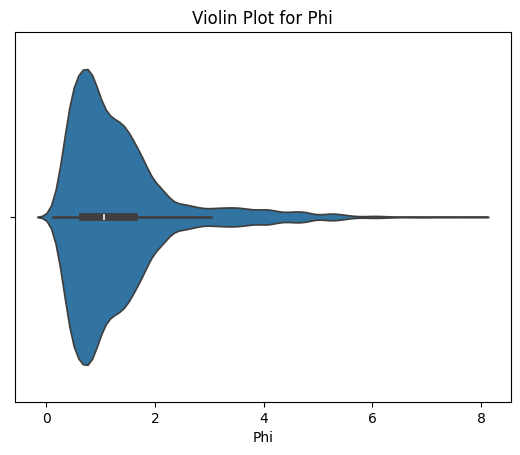

In [12]:
numeric_columns = df1.select_dtypes(include=['float'])

# Create a violin plot for each column
for column in numeric_columns.columns:
    sns.violinplot(x=df[column])
    plt.title(f'Violin Plot for {column}')
    plt.show()

## We remove exact molecular weight below 80 as outliers

<Axes: xlabel='exactmw'>

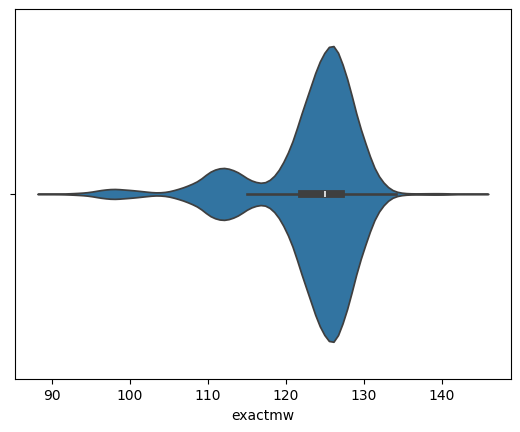

In [13]:
df_new = df1[df1['exactmw'] > 90]
sns.violinplot(x=df_new['exactmw'])

In the figure, we see emissions with a solubility value less than -10, it may make sense to remove them, we will also check this in other ways

# #### 4.2. Z-score method
The Z-score method is a statistical technique used to identify outliers in a dataset. It measures how many standard deviations a data point is away from the mean. Typically, a threshold value is set, and any data point with a Z-score greater than this threshold is considered an outlier.


In [14]:
df_new =df_new.reset_index(drop=True)

<Axes: xlabel='NumAtoms'>

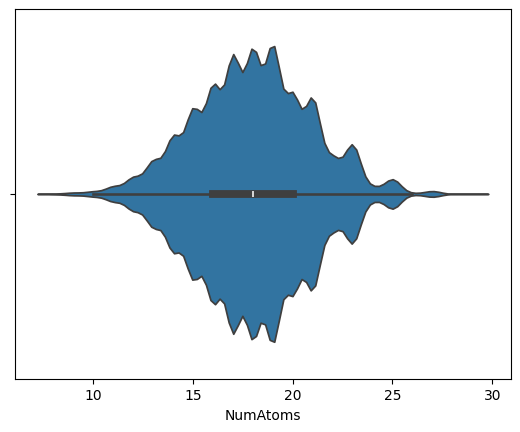

In [15]:
sns.violinplot(x=df_new['NumAtoms'])

In [16]:
def detect_outliers_zscore(data, threshold=3.0):
    """
    Detect outliers using Z-score method.

    Parameters:
        data (array-like): Input data.
        threshold (float): Z-score threshold for identifying outliers.

    Returns:
        outliers (array-like): Array containing the indices of outlier data points.
    """
    mean = np.mean(data)
    std_dev = np.std(data)
    z_scores = [(x - mean) / std_dev for x in data]
    outliers = np.where(np.abs(z_scores) > threshold)[0]
    return outliers

# Example usage:
outliers = detect_outliers_zscore(df_new['NumAtoms'])
print("Indices of outliers:", outliers)
print("Outlier values:", [df_new['NumAtoms'][i] for i in outliers])

Indices of outliers: [  337   687   844   942  1093  1252  1501  1553  1704  1847  1956  2358
  2695  2939  3052  3123  3632  3916  4003  4347  5050  5086  5235  5408
  5589  5721  5840  5906  6182  6205  6291  6328  6447  6756  6790  6792
  7762  7767  7957  7967  8036  8365  8430  8744  8994  9017  9301  9525
  9970 10574 10726 10834 10858 11052 11745 11750 11809 11849 11859 11913
 12175 12536 12731 13219 14093 14195 14220 14675 15216 15230 15281 15731
 15750 15890 15919 15945 15956 16608 16730 16767 17169 17508 17660 17888
 17964 18182 18215 18311 18430 18556 18713 18958 19137 19519]
Outlier values: [9.0, 9.0, 27.0, 9.0, 27.0, 9.0, 27.0, 27.0, 8.0, 27.0, 29.0, 9.0, 9.0, 27.0, 9.0, 27.0, 27.0, 29.0, 8.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 9.0, 9.0, 27.0, 9.0, 27.0, 27.0, 8.0, 9.0, 9.0, 27.0, 27.0, 27.0, 9.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 9.0, 8.0, 27.0, 9.0, 27.0, 27.0, 27.0, 27.0, 27.0, 9.0, 27.0, 27.0, 27.0, 9.0, 27.0, 8.0, 9.0, 27.0, 27.0, 27.0, 27.0, 8.0, 29.0,

### 5. Data Transformation


In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19891 entries, 0 to 19890
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   exactmw                          19891 non-null  float64
 1   amw                              19891 non-null  float64
 2   lipinskiHBA                      19891 non-null  float64
 3   lipinskiHBD                      19891 non-null  float64
 4   NumRotatableBonds                19891 non-null  float64
 5   NumHBD                           19891 non-null  float64
 6   NumHBA                           19891 non-null  float64
 7   NumHeavyAtoms                    19891 non-null  float64
 8   NumAtoms                         19891 non-null  float64
 9   NumHeteroatoms                   19891 non-null  float64
 10  NumAmideBonds                    19891 non-null  float64
 11  FractionCSP3                     19891 non-null  float64
 12  NumRings          

## LabelEncoder helps us to convert categorical data into numerical. In our data we have 'smiles' as categorical value and we changed it into numerical one using this function.

In [18]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding
label_encoder = LabelEncoder()
df_new['encoded_smiles'] = label_encoder.fit_transform(df_new['smiles'])

df_new[['smiles', 'encoded_smiles']]

,smiles,encoded_smiles
0,C1C(CN1)(C=O)OC=O,821
1,CCC#CCCCOC,9107
2,CC1NC(=O)OC2CC12,8579
3,CNc1nc(n(n1)C)N,12304
4,OC1CN2CC2(C1)C#N,18012
...,...,...
19886,C#CC(=O)CNC=O,42
19887,CN1C=NC(=O)OC1=N,11589
19888,CCC1(CC)CC(=N)O1,9589
19889,CCC1C(CO)C1C#C,9989


## One-hot encoding converts categorical variables into binary vectors, facilitating their use as numerical inputs in machine learning models without imposing ordinal relationships between categories.

In [19]:
# Perform one-hot encoding
# one_hot_encoded = pd.get_dummies(filtered_data['Group'], prefix='Group')

# We already convert categorical values using label encoder, so we are not using one_hot_encoder function.

# Concatenate the one-hot encoded columns with the original DataFrame
# filtered_data = pd.concat([filtered_data, one_hot_encoded], axis=1)
# filtered_data

## Normalization
At this step, we normalize our data using mean max scaler


In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19891 entries, 0 to 19890
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   exactmw                          19891 non-null  float64
 1   amw                              19891 non-null  float64
 2   lipinskiHBA                      19891 non-null  float64
 3   lipinskiHBD                      19891 non-null  float64
 4   NumRotatableBonds                19891 non-null  float64
 5   NumHBD                           19891 non-null  float64
 6   NumHBA                           19891 non-null  float64
 7   NumHeavyAtoms                    19891 non-null  float64
 8   NumAtoms                         19891 non-null  float64
 9   NumHeteroatoms                   19891 non-null  float64
 10  NumAmideBonds                    19891 non-null  float64
 11  FractionCSP3                     19891 non-null  float64
 12  NumRings          

In [21]:
df_enc = df_new.drop(columns = ['smiles'])

df_enc.head()

,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,NumAtoms,NumHeteroatoms,...,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi,encoded_smiles
0,129.042593,129.115,4.0,1.0,3.0,1.0,4.0,9.0,16.0,4.0,...,2.614120,1.346061,1.346061,0.661663,-0.90,6.223457,2.144233,0.928882,1.482727,821
1,126.104465,126.199,1.0,0.0,3.0,0.0,1.0,9.0,23.0,1.0,...,3.361137,0.952015,0.952015,0.518283,-0.48,8.520000,7.520000,7.520000,7.118933,9107
2,127.063329,127.143,3.0,1.0,0.0,1.0,2.0,9.0,18.0,3.0,...,3.243139,2.025049,2.025049,1.315724,-0.73,5.086451,1.403530,0.676972,0.793220,8579
3,127.085795,127.151,5.0,3.0,1.0,2.0,5.0,9.0,18.0,5.0,...,2.580316,1.020335,1.020335,0.502436,-1.26,5.869199,1.925197,0.932992,1.255485,12304
4,124.063663,124.143,3.0,1.0,0.0,1.0,3.0,9.0,17.0,3.0,...,3.111471,2.166863,2.166863,1.573785,-0.59,5.214986,1.282121,0.520627,0.742916,18012


#### 6.3. Min-Max normalization
Min-Max normalization, also known as feature scaling, rescales the data to a fixed range, typically between 0 and 1.

In [22]:
from sklearn.preprocessing import MinMaxScaler


# Min-Max normalization
scaler = MinMaxScaler()
df_enc_minmax = scaler.fit_transform(df_enc)

# Convert the scaled array into a DataFrame
df_enc_minmax = pd.DataFrame(df_enc_minmax, columns=df_enc.columns)


df_enc_minmax

,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,NumAtoms,NumHeteroatoms,...,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi,encoded_smiles
0,0.722315,0.722720,0.571429,0.142857,0.500000,0.2,0.571429,1.000000,0.380952,0.571429,...,0.381276,0.199311,0.199311,0.119527,0.526316,0.573351,0.238653,0.109714,0.176425,0.041277
1,0.667914,0.668734,0.142857,0.000000,0.500000,0.0,0.142857,1.000000,0.714286,0.142857,...,0.628567,0.127375,0.127375,0.093626,0.747368,0.926242,0.947273,0.944287,0.905486,0.457868
2,0.685668,0.686211,0.428571,0.142857,0.000000,0.2,0.285714,1.000000,0.476190,0.428571,...,0.589505,0.323265,0.323265,0.237680,0.615789,0.398637,0.141015,0.077817,0.087235,0.431322
3,0.686084,0.686359,0.714286,0.428571,0.166667,0.4,0.714286,1.000000,0.476190,0.714286,...,0.370085,0.139847,0.139847,0.090763,0.336842,0.518916,0.209780,0.110234,0.147030,0.618602
4,0.630127,0.630670,0.428571,0.142857,0.000000,0.2,0.428571,1.000000,0.428571,0.428571,...,0.545918,0.349155,0.349155,0.284298,0.689474,0.418388,0.125011,0.058020,0.080728,0.905581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19886,0.388837,0.389195,0.428571,0.142857,0.500000,0.2,0.285714,0.666667,0.238095,0.428571,...,0.169465,0.046123,0.046123,0.033491,0.315789,0.646578,0.466856,0.360915,0.404468,0.002112
19887,0.685202,0.685470,0.714286,0.142857,0.000000,0.2,0.714286,1.000000,0.285714,0.714286,...,0.268417,0.107049,0.107049,0.066339,0.268421,0.499279,0.199601,0.124059,0.137122,0.582655
19888,0.686342,0.687026,0.285714,0.142857,0.333333,0.2,0.285714,1.000000,0.666667,0.285714,...,0.670125,0.338976,0.338976,0.214963,0.721053,0.629378,0.221081,0.110353,0.175039,0.482102
19889,0.630593,0.631410,0.142857,0.142857,0.333333,0.2,0.142857,1.000000,0.619048,0.142857,...,0.647120,0.356350,0.356350,0.270577,0.747368,0.636954,0.273533,0.112551,0.214423,0.502212


In [23]:
df_enc_minmax.to_csv('regina_data_after_encoding.csv')